# 浸水想定区域データの加工
## 都道府県ごとの浸水想定区域データから任意の水系のshpファイルを作成
- 国土数値情報：浸水想定区域
- http://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-A31.html


In [1]:
import glob
import re
import os
import pandas as pd

## １）★河川名と都道府県(English)を変数に代入

In [2]:
# 都道府県
region = "Kanagawa"

In [3]:
# 抽出する河川
river = "相模川"

In [4]:
# 抽出する河川
river_2 = "Sagamigawa"

In [5]:
dir = "../Data/Raw"

## ２）浸水想定区域データの属性ファイル(txt)をリスト(allFiles)に保存
- （参考）https://note.nkmk.me/python-glob-usage/

In [6]:
allFiles = sorted(glob.glob(dir + "/" + region + "*/*/*.txt"))

In [7]:
len(allFiles)

31

In [8]:
allFiles

['../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14001.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14002.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14003.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14004.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14005.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14006.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14007.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14008.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14009.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14010.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14011.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14012.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14013.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14014.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14015.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14016.txt',
 '../Data/Raw\\Kanagawa_Tamagawa\\属性テキストファイル\\14017.txt',
 '../Data/Raw\

## ３）抽出する河川名の入ったファイルをリスト化(list_1)
- （参考）https://note.nkmk.me/python-file-io-open-with/
- （参考）https://note.nkmk.me/python-str-search/
- （参考）https://note.nkmk.me/python-if-elif-else/

In [9]:
list_1 = []

In [10]:
for file_ in allFiles:
    with open(file_) as f:
        s = f.read()
        if river in s:
            # ファイル名（５桁の数字）を抽出
            code = f.name[-9:-4]
            list_1.append(code)

In [11]:
list_1

['14001', '14003', '14014', '14015', '14018', '14019', '14023', '83007']

In [12]:
# 確認用
with open(dir + "/" + region + "_Tamagawa/属性テキストファイル/" + list_1[0] + ".txt") as f:
        s = f.read()

In [13]:
s

'"説明文","(1)","この図は、相模川水系道志川の浸水想定区域と、当該区域が浸水した場合に想定される水深その他を示したものです。"\n"説明文","(2)","この浸水想定区域は、解析時点の道志川の河道等の整備状況を勘案して、洪水防御に関する計画の基本となる降雨である概ね30年に1回程度起こる大雨が降ったことにより、道志川がはん濫した場合に想定される浸水の状況を、シミュレーションにより求めたものです。"\n"説明文","(3)","このシミュレーションの実施にあたっては、想定を越える降雨、相模川等隣接する河川や支川のはん濫、内水によるはん濫等を考慮していませんので、この浸水想定区域図に指定されていない区域においても浸水が発生する場合や、想定される水深が実際の浸水深と異なる場合があります。"\n"作成種別コード","","14"\n"作成主体","","神奈川県"\n"指定年月日","","記載なし"\n"告示番号","","記載なし"\n"対象となる洪水予報河川","","相模川水系道志川\u3000（実施区間：左岸\u3000相模原市藤野町牧野10，536番地地先、山梨県界から相模川合流点まで\u3000右岸\u3000相模原市津久井町青根3，657番地地先、山梨県界から相模川合流点まで）"\n"指定の前提となる計画降雨","","1時間最大雨量\u300074mm"\n"関係市町村","","相模原市"\n"その他計算条件等","①","この図は、道志川で溢水、破堤した場合の浸水想定区域を図示しています。このため、対象河川以外の支川等が溢水、破堤した場合の浸水状況は図示していません。"\n"その他計算条件等","②","この図は、道志川において、危険となる水位に達した時点で破堤、堤防のある区間においては越水及び堤防のない区間においては溢水したときのはん濫計算結果を基に作成したものです。"\n"その他計算条件等","③","はん濫計算は、対象区間を25m格子（計算メッシュという）に分割して、これを1単位として計算しています。また、計算メッシュの地盤高は基本的に航空測量データを基に平均地盤高を算定したものを使用しています。このため、微地形による影響を表せていない場合があります。"\n"その他計算条件等","④","浸水想定区域や等深線は、はん濫計算結果から計算

## ４）浸水想定区域のシェープファイル(shp)を読み込み(data)
- geopandasライブラリを利用
- （参考）https://www.gis-py.com/entry/geopandas-master

In [14]:
# geopandasをインポート
import geopandas as gpd
from matplotlib import pyplot as plt

In [15]:
# Jupyter Notebookでノートブック上にグラフを描画する際に指定する記述
%matplotlib inline

## ５）★都道府県コードを変数（code）に代入

In [16]:
# 都道府県コードを代入
code = "14"

In [17]:
fp = dir + "/" + region + "_Tamagawa/A31-12_" + code + ".shp"

In [18]:
fp

'../Data/Raw/Kanagawa_Tamagawa/A31-12_14.shp'

In [19]:
data = gpd.read_file(fp, encoding="SHIFT-JIS")

In [20]:
data.head()

,A31_001,A31_002,A31_003,A31_004,A31_005,A31_006,geometry
0,11,14,神奈川県,引地川：平成19年11月6日 蓼川：平成19年11月6日,引地川：神奈川県 告示第707号、蓼川：神奈川県 告示 第708号,14005,"POLYGON ((139.44589 35.43813, 139.44584 35.438..."
1,11,14,神奈川県,引地川：平成19年11月6日 蓼川：平成19年11月6日,引地川：神奈川県 告示第707号、蓼川：神奈川県 告示 第708号,14005,"POLYGON ((139.45606 35.41452, 139.45615 35.414..."
2,13,14,神奈川県,引地川：平成19年11月6日 蓼川：平成19年11月6日,引地川：神奈川県 告示第707号、蓼川：神奈川県 告示 第708号,14005,"POLYGON ((139.46247 35.44542, 139.46243 35.444..."
3,13,14,神奈川県,引地川：平成19年11月6日 蓼川：平成19年11月6日,引地川：神奈川県 告示第707号、蓼川：神奈川県 告示 第708号,14005,"POLYGON ((139.44383 35.42291, 139.44384 35.423..."
4,13,14,神奈川県,引地川：平成19年11月6日 蓼川：平成19年11月6日,引地川：神奈川県 告示第707号、蓼川：神奈川県 告示 第708号,14005,"POLYGON ((139.45710 35.37905, 139.45694 35.379..."


## ６）"多摩川"の入ったデータ（list_1)を抽出
- （参考）https://note.nkmk.me/python-pandas-concat/

In [21]:
list_2 = []

In [22]:
for i in list_1:
    data_1 = data[data.A31_006 == i]
    list_2.append(data_1)
data_2 = pd.concat(list_2)

In [23]:
data_2.head()

,A31_001,A31_002,A31_003,A31_004,A31_005,A31_006,geometry
2702,11,14,神奈川県,記載なし,記載なし,14001,"POLYGON ((139.19950 35.56956, 139.19957 35.569..."
2703,12,14,神奈川県,記載なし,記載なし,14001,"POLYGON ((139.19950 35.56956, 139.19942 35.569..."
2704,13,14,神奈川県相模原土木事務所,平成19年5月29日,神奈川県 告示第385号,14003,"POLYGON ((139.38745 35.48584, 139.38746 35.485..."
2705,11,14,神奈川県相模原土木事務所,平成19年5月29日,神奈川県 告示第385号,14003,"POLYGON ((139.37267 35.53690, 139.37268 35.536..."
2706,11,14,神奈川県相模原土木事務所,平成19年5月29日,神奈川県 告示第385号,14003,"POLYGON ((139.37251 35.53633, 139.37253 35.536..."


## ７）７段階浸水深ランクを５段階に変換
- （参考）https://qiita.com/Hyperion13fleet/items/98c31744e66ac1fc1e9f

In [24]:
# 条件分岐の関数を定義
def func_cat(x):
    if x ==21:
        return 11
    elif x == 22:
        return 12
    elif x == 23:
        return 13
    elif x == 24:
        return 14
    elif x == 25:
        return 14
    elif x == 26:
        return 14
    elif x == 27:
        return 15
    else:
        return x

# applyで適用
data_2["Shinsui"] = data_2["A31_001"].apply(func_cat)  

In [25]:
data_2

,A31_001,A31_002,A31_003,A31_004,A31_005,A31_006,geometry,Shinsui
2702,11,14,神奈川県,記載なし,記載なし,14001,"POLYGON ((139.19950 35.56956, 139.19957 35.569...",11
2703,12,14,神奈川県,記載なし,記載なし,14001,"POLYGON ((139.19950 35.56956, 139.19942 35.569...",12
2704,13,14,神奈川県相模原土木事務所,平成19年5月29日,神奈川県 告示第385号,14003,"POLYGON ((139.38745 35.48584, 139.38746 35.485...",13
2705,11,14,神奈川県相模原土木事務所,平成19年5月29日,神奈川県 告示第385号,14003,"POLYGON ((139.37267 35.53690, 139.37268 35.536...",11
2706,11,14,神奈川県相模原土木事務所,平成19年5月29日,神奈川県 告示第385号,14003,"POLYGON ((139.37251 35.53633, 139.37253 35.536...",11
...,...,...,...,...,...,...,...,...
3755,24,83,国土交通省関東地方整備局京浜工事事務所,平成14年8月30日,国土交通省関東地方整備局告示第319号,83007,"POLYGON ((139.38431 35.32515, 139.38431 35.326...",14
3756,21,83,国土交通省関東地方整備局京浜工事事務所,平成14年8月30日,国土交通省関東地方整備局告示第319号,83007,"POLYGON ((139.37337 35.33661, 139.37337 35.335...",11
3757,22,83,国土交通省関東地方整備局京浜工事事務所,平成14年8月30日,国土交通省関東地方整備局告示第319号,83007,"POLYGON ((139.38118 35.34806, 139.38274 35.348...",12
3758,23,83,国土交通省関東地方整備局京浜工事事務所,平成14年8月30日,国土交通省関東地方整備局告示第319号,83007,"POLYGON ((139.38118 35.32307, 139.37962 35.323...",13


In [26]:
data_2.dtypes

A31_001        int64
A31_002        int64
A31_003       object
A31_004       object
A31_005       object
A31_006       object
geometry    geometry
Shinsui        int64
dtype: object

In [27]:
type(data_2)

geopandas.geodataframe.GeoDataFrame

## ８）Fionaを使用して測地系の設定
- （参考）https://www.gis-py.com/entry/geopandas-master

In [28]:
from fiona.crs import from_epsg

In [29]:
data_2.crs = from_epsg(2451)

In [30]:
data_2.crs

{'init': 'epsg:2451', 'no_defs': True}

## ９）shpファイルに書き出し

- 抽出する河川名のファイルの要素数あるリストを作成
- （参考）http://nekoyukimmm.hatenablog.com/entry/2016/02/26/091217

In [31]:
dir_1 = "../Data/Working"

In [32]:
dir_2 = dir_1 + "/" + region + "_" + river_2

In [33]:
dir_2

'../Data/Working/Kanagawa_Sagamigawa'

In [34]:
# 作成したデータ格納用にディレクトリを作成
os.mkdir(dir_2)

In [35]:
data_2.to_file(dir_2, encoding='UTF-8')

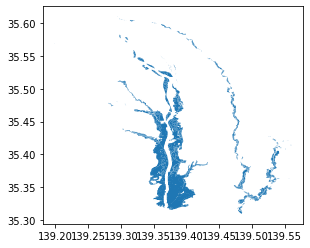

In [36]:
data_2.plot()